# Day 5: Hydrothermal Venture

## Part 1

You come across a field of hydrothermal vents on the ocean floor! These vents constantly produce large, opaque clouds, so it would be best to avoid them if possible.

They tend to form in lines; the submarine helpfully produces a list of nearby lines of vents (your puzzle input) for you to review. For example:
```
0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2
```
Each line of vents is given as a line segment in the format x1,y1 -> x2,y2 where x1,y1 are the coordinates of one end the line segment and x2,y2 are the coordinates of the other end. These line segments include the points at both ends. In other words:

- An entry like 1,1 -> 1,3 covers points 1,1, 1,2, and 1,3.
- An entry like 9,7 -> 7,7 covers points 9,7, 8,7, and 7,7.

For now, only consider horizontal and vertical lines: lines where either x1 = x2 or y1 = y2.

So, the horizontal and vertical lines from the above list would produce the following diagram:
```
.......1..
..1....1..
..1....1..
.......1..
.112111211
..........
..........
..........
..........
222111....
```
In this diagram, the top left corner is 0,0 and the bottom right corner is 9,9. Each position is shown as the number of lines which cover that point or . if no line covers that point. The top-left pair of 1s, for example, comes from 2,2 -> 2,1; the very bottom row is formed by the overlapping lines 0,9 -> 5,9 and 0,9 -> 2,9.

To avoid the most dangerous areas, you need to determine the number of points where at least two lines overlap. In the above example, this is anywhere in the diagram with a 2 or larger - a total of 5 points.

Consider only horizontal and vertical lines. At how many points do at least two lines overlap?

In [1]:
import numpy as np
import re
from IPython.display import Image
from matplotlib import pyplot as plt
import cv2

In [2]:
def load_vents(path):
    file = open(path, "r")
    lines = file.readlines()
    
    lines2 = ([re.split(r'\D+',l) for l in lines])
    
    lines = np.array([l.strip("\n") for l in lines])
    lines = ([l.split(" -> ") for l in lines])
    
    for l in lines2:
        try:
            l.remove('')
        except:
            continue
    lines2 = np.array(lines2)  
    
    nrows = int(len(lines))
    ncols = int(len(lines[0]))
    
    coords = np.zeros([nrows,ncols])
    
    for i in range(0, nrows):
        for j in range(0, ncols):
            lines[i][j] = lines[i][j].split(',')
    for i in range(0, nrows):
        for j in range(0, ncols):
            for k in range(0,len(lines[1][0])):
                lines[i][j][k] = int(lines[i][j][k])
    
    lines = np.array(lines)
    size = np.shape(lines)
    lines = np.reshape(lines,[size[0],size[1]*size[2]])
    return lines

In [3]:
def write_map(vents):
    
    max_dims = np.max(vents,0)
    
    max_x = max([max_dims[0],max_dims[2]])
    max_y = max([max_dims[1],max_dims[3]])

    vent_map = np.zeros([max_x+1,max_y+1])
    
    for vi,v in enumerate(vents):
        if v[0] == v[2]:   # horizontal line
            
            x = np.sort([v[0],v[2]])
            y = np.sort([v[1],v[3]])
            
            y = np.array(range(y[0],y[1]+1))
            x = np.array([x[0]]*len(y))
            
            vent_map[y,x]+=1
            
        elif v[1] == v[3]:  # vertical line
                    
            x = np.sort([v[0],v[2]])
            y = np.sort([v[1],v[3]])
            
            x = np.array(range(x[0],x[1]+1))
            y = np.array([y[0]]*len(x))
 
            vent_map[y,x]+=1
        
        else: 
            continue
            
    danger_zones = (vent_map > 1).sum()
    
    return vent_map, danger_zones

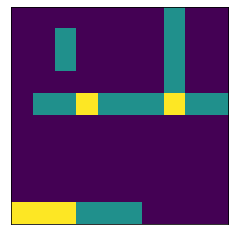

There are  5  hotspots.


In [4]:
vents = load_vents("day05_data_test.txt")
[vent_map, zones] = write_map(vents)
plt.imshow(vent_map)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

print("There are ",zones," hotspots.")

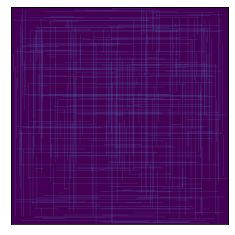

There are  5306  hotspots.


In [5]:
vents = load_vents("day05_data.txt")
[vent_map, zones] = write_map(vents)

plt.imshow(vent_map)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

print("There are ",zones," hotspots.")

## Part 2

Unfortunately, considering only horizontal and vertical lines doesn't give you the full picture; you need to also consider diagonal lines.

Because of the limits of the hydrothermal vent mapping system, the lines in your list will only ever be horizontal, vertical, or a diagonal line at exactly 45 degrees. In other words:

- An entry like 1,1 -> 3,3 covers points 1,1, 2,2, and 3,3.
- An entry like 9,7 -> 7,9 covers points 9,7, 8,8, and 7,9.
Considering all lines from the above example would now produce the following diagram:
```
1.1....11.
.111...2..
..2.1.111.
...1.2.2..
.112313211
...1.2....
..1...1...
.1.....1..
1.......1.
222111....
```
You still need to determine the number of points where at least two lines overlap. In the above example, this is still anywhere in the diagram with a 2 or larger - now a total of 12 points.

Consider all of the lines. At how many points do at least two lines overlap?

In [6]:
def write_map(vents):
    
    max_dims = np.max(vents,0)
    
    max_x = max([max_dims[0],max_dims[2]])
    max_y = max([max_dims[1],max_dims[3]])

    vent_map = np.zeros([max_x+1,max_y+1])
    
    for vi,v in enumerate(vents):
        if v[0] == v[2]:   # horizontal line
            
            x = np.sort([v[0],v[2]])
            y = np.sort([v[1],v[3]])
            
            y = np.array(range(y[0],y[1]+1))
            x = np.array([x[0]]*len(y))
            
            vent_map[y,x]+=1
            
        elif v[1] == v[3]:  # vertical line
                    
            x = np.sort([v[0],v[2]])
            y = np.sort([v[1],v[3]])
            
            x = np.array(range(x[0],x[1]+1))
            y = np.array([y[0]]*len(x))
 
            vent_map[y,x]+=1
        
        else: # diagonal line
            
            if v[2] > v[0]:
                x = np.array(range(v[0], v[2] + 1))
            else:
                x = np.array(range(v[0], v[2] - 1, -1))
            if v[3] > v[1]:
                y = np.array(range(v[1], v[3] + 1))
            else:
                y = np.array(range(v[1], v[3] - 1, -1))
                
            vent_map[y,x]+=1
            
    danger_zones = (vent_map > 1).sum()
    
    return vent_map, danger_zones



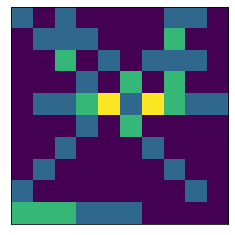

There are  12  hotspots.


In [7]:
vents = load_vents("day05_data_test.txt")
[vent_map, zones] = write_map(vents)

plt.imshow(vent_map)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

print("There are ",zones," hotspots.")

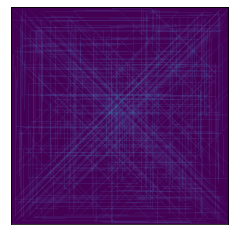

There are  17787  hotspots.


In [8]:
vents = load_vents("day05_data.txt")
[vent_map, zones] = write_map(vents)

plt.imshow(vent_map)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

print("There are ",zones," hotspots.")